In [88]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from itertools import combinations
import operator
import matplotlib.pyplot as plt

In [90]:
def random_graph(N, p):
    '''Returns a random graph with N nodes which are connected with probability p
       Parameters:
        N (int):   Number of nodes
        p (float): Probability of connecting nodes'''
    
    if p < 0 or  p  > 1:
        raise ValueError("p is probability between 0 and 1")
    if isinstance(N, int) == False or N < 0:
        raise ValueError("N is non-negative integer number")
    G = nx.Graph()
    list_of_nodes = list(range(0, N, 1))
    G.add_nodes_from(list_of_nodes)
    for pair in combinations(list_of_nodes, 2):
        rand_number = np.random.random()
        if rand_number < p:
            G.add_edge(pair[0], pair[1])
        else:
            pass
    return G

def Barabasi_Albert_graph(m0, m, t):
    ''' Returns Barabasi Albert graph with m0+t nodes, m0 number of initial nodes 
    and m number of new node's links. We start with complete graph with m0 nodes. 
    Then each node is adding and connecting to m existing nodes with probability p,
    which depends on the degree
    Parameters:
        m0 (int): Number of initial nodes
        m (int):  Number of new nodes links 
        t (int):  Number of new nodes (future steps)'''
    
    if m < 1 or m >= m0:
        raise ValueError("Barabasi–Albert network must have m >= 1")
        
    if m0 < 0 or t < 0:
        raise ValueError("m0 and t are non-negative number")
        
    G = nx.complete_graph(m0)
    new_node = m0
    
    for _ in range(t):
        G.add_node(new_node)
        for e in range(0, m):
            counter = 0
            while counter != 1:
                if len(G.edges()) == 0:
                    chosen_node = 0
                else:
                    probabilities_of_nodes = []
                    for node in G.nodes():
                        node_degree = G.degree(node)
                        node_probability = node_degree / sum(dict(G.degree()).values()) # (2 * len(G.edges()))
                        probabilities_of_nodes.append(node_probability)
                    chosen_node = np.random.choice(G.nodes(), p = probabilities_of_nodes)
                new_edge = (chosen_node, new_node)
                if new_edge in G.edges():
                    chosen_node = np.random.choice(G.nodes(), p = probabilities_of_nodes)
                elif (new_edge[1], new_edge[0]) in G.edges():
                    chosen_node = np.random.choice(G.nodes(), p = probabilities_of_nodes)
                else:
                    G.add_edge(new_edge[0], new_edge[1])
                    counter = 1
        new_node += 1
    return G

def Watts_Strogatz_graph(N, K, p):
    ''' Returns Watt Strogratz graph with N nodes, K number of connections between nodes 
    at the beggining and probability of rewiring p. At the begining there is a regular, 
    circular graph. Then each node is rewired to a randomly chosen node with 
    probability p
    Parameters:
        N (int):  Number of nodes
        K(int):   Number of connections between nodes at the beggining 
        p(float): Probability of rewiring'''
    
    if p < 0 or  p > 1:
        raise ValueError("p is probability between 0 and 1")  
        
    if isinstance(N, int) == False or isinstance(K, int) == False:
        raise ValueError("N and K are integer numbers")
                         
    G = nx.Graph()
    list_of_edges = set()
    list_of_nodes = list(range(N))
    list_of_nodes_x2 = list(range(N)) * 2
    if int(K) % 2 == 0:
        k = int(K/2)
    else:
        k = int((K-1)/2)
        
    for i in range(N):
        from_vert = [i] * k
        to_vert = list_of_nodes_x2[i + 1 : i + k+1]
        list_of_edges.update(set(zip(from_vert, to_vert)))
    list_of_edges=list(list_of_edges)
    
    for link in list_of_edges:
        rand_number = np.random.random()
        if rand_number >= p:
            counter = 0
            while counter != 1:
                if link in G.edges(): # check if link is in graph
                    random_index = np.random.choice(list(range(len(list_of_edges))))
                    link = list_of_edges[random_index]
                elif (link[1], link[0]) in G.edges():
                    random_index = np.random.choice(list(range(len(list_of_edges))))
                    link = list_of_edges[random_index]
                else:
                    G.add_edge(link[0], link[1])
                    counter = 1
            
        elif rand_number < p:
            list_of_other_edges = []
            for i in range(len(list_of_nodes)): # all possible edges with one node
                list_of_other_edges.append((link[0], i))
            list_of_other_edges.remove((link[0], link[0]))
            new_links = []
            new_links = [i for i in list_of_other_edges if i not in G.edges()] # all possible edges which are not existing
            random_index = np.random.choice(list(range(len(new_links))))
            new_edge = new_links[random_index]
            G.add_edge(new_edge[0], new_edge[1])    
    return G

def giant_component(g):
    components = sorted(nx.connected_components(g), key=len, reverse=True)
    try:
        giantC = g.subgraph(components[0])
    except:
        return 0
    P_inf = len(giantC.nodes())
    return P_inf

In [ ]:
N = 10**3
L = 50

k_rg = [0.5, 1, 2, 4]
k_ba = [2, 4]
k_ws = [2, 4]
beta = 0.01

The theoretical results for the parameters based on an average degree $<k>$ for the graphs are equal to:

Random : $p = \frac{<k>}{(N-1)}$

Barabasi-Albert: $m = \frac{<k>}{2}$

Watts and Strogatz: $k = <k>$.


RANDOM 

Robustness of networks in case of errors: we randomly select and remove an f
fraction of nodes and measure the relative size of the giant component P∞(f)/P∞(0) as a function
of f for several networks

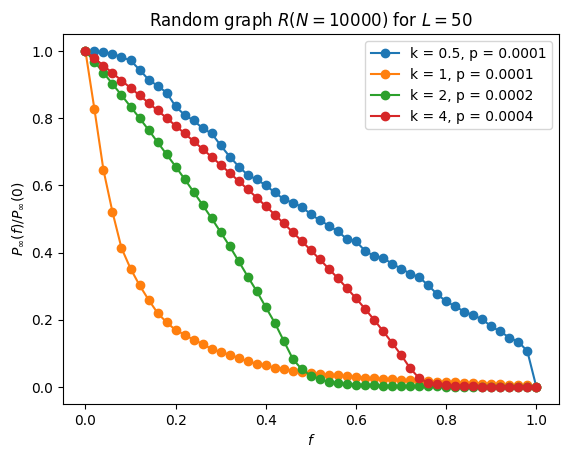

In [95]:
#Random
for k in k_rg:
    p = k / (N - 1)
    G = nx.fast_gnp_random_graph(N, p)
    frac_P_inf = []
    for _ in range(L):
        G_new = G.copy()
        nodes_new = len(G_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(G_new)
        data = []
        data.append(1)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                nodes = list(G_new.nodes)
                random_node = random.choice(nodes)
                G_new.remove_node(random_node)
            data.append(giant_component(G_new) / P_inf_0)
        frac_P_inf.append(data)
    frac_P_inf = np.mean(frac_P_inf, axis=0)
    f = np.linspace(0, 1, L + 1)
    plt.plot(f, frac_P_inf,  marker="o",label="k = " + str(k)+ ", p = "+str(round(p,4)))
plt.title(r"Random graph $R(N={})$".format(N,p) + r" for $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.show()

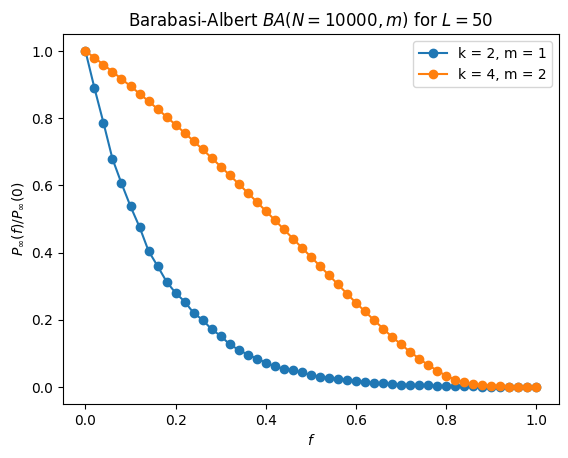

In [96]:
#Barabasi-Albert
for kb in k_ba:
    m = int(kb / 2)
    BA = nx.barabasi_albert_graph(N, m)
    frac_P_inf = []
    for _ in range(L):
        BA_new = BA.copy()
        nodes_new = len(BA_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(BA_new)
        data = []
        data.append(1)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                nodes = list(BA_new.nodes)
                random_node = random.choice(nodes)
                BA_new.remove_node(random_node)
            data.append(giant_component(BA_new) / P_inf_0)
        frac_P_inf.append(data)
    frac_P_inf = np.mean(frac_P_inf, axis=0)
    f = np.linspace(0, 1, L + 1)
    plt.plot(f, frac_P_inf, marker='o',label="k = " + str(kb)+ ", m = "+str(round(m,4)))
plt.title(r"Barabasi-Albert $BA(N={}, m)$".format(N) + r" for $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.show()

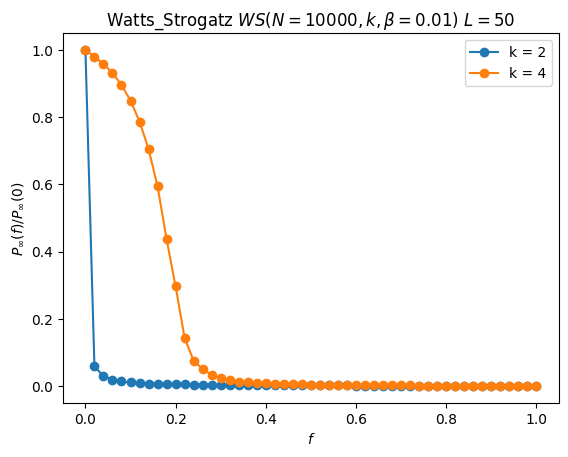

In [97]:
#Watts_Strogatz
for kw in k_ws:
    WS = Watts_Strogatz_graph(N, kw, beta)
    frac_P_inf = []
    for _ in range(L):
        WS_new = WS.copy()
        nodes_new = len(WS_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(WS_new)
        data = []
        data.append(1)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                nodes = list(WS_new.nodes)
                random_node = random.choice(nodes)
                WS_new.remove_node(random_node)
            data.append(giant_component(WS_new) / P_inf_0)
        frac_P_inf.append(data)
    frac_P_inf = np.mean(frac_P_inf, axis=0)
    f = np.linspace(0, 1, L + 1)
    plt.plot(f, frac_P_inf,marker='o', label="k = " + str(kw))
plt.title(r"Watts_Strogatz $WS(N={}, k, \beta={})$".format(N,beta) + r" $ L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.show()

Degree centrality

Robustness of networks in case of attacks: we first remove the highest degree node, followed by the node with the next highest degree and so on until a $f$ fraction of nodes is removed. Then, analogously like in the previous task, we measure the relative size of the giant component $P_{\infty}(f)/P_{\infty}(0)$ as a function of $f$.

In [43]:
N=10**3
N1=10**4

In [87]:
def robustness(g):
    m = nx.degree_centrality(g)
    l = sorted(m.items(), key = operator.itemgetter(1), reverse=True)
    x = []
    y = []
    largest_component = max(nx.connected_components(g), key=len)
    n = len(g.nodes())
    x.append(0)
    y.append(len(largest_component) * 1. / n)
    R = 0.0
    for i in range(1, n - 1):
        g.remove_node(l.pop(0)[0])
        m = nx.degree_centrality(g)
        l = sorted(m.items(), key = operator.itemgetter(1), reverse=True)
        largest_component = max(nx.connected_components(g), key=len)
        x.append(i * 1. / n)
        R += len(largest_component) * 1. / n
        y.append(len(largest_component) * 1. / n)
    return x, y
def dee_centrality(G):
    frac_P_inf = []
    for _ in range(L):
        G_new = G.copy()
        nodes_new = len(G_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(G_new)
        data = []
        data.append(1)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                nodes = dict(G_new.degree())
                chosen_node = max(nodes, key=nodes.get)
                G_new.remove_node(chosen_node)
            data.append(giant_component(G_new) / P_inf_0)
        frac_P_inf.append(data)
    frac_P_inf = np.mean(frac_P_inf, axis=0)
    f = np.linspace(0, 1, L + 1)
    return f, frac_P_inf

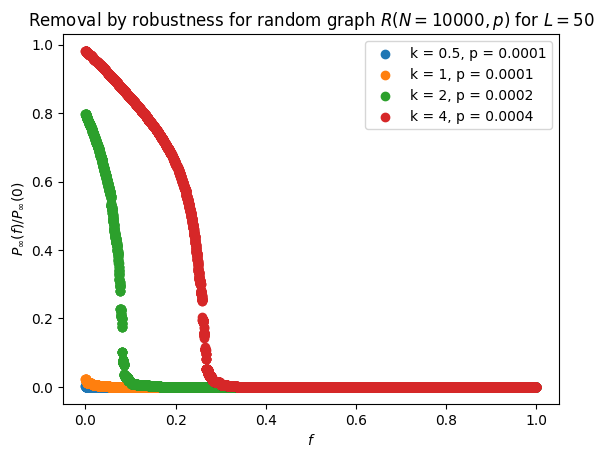

In [63]:
for k in k_rg:
    p = k / (N - 1)
    G = nx.fast_gnp_random_graph(N, p)
    x_G, y_G = dee_centrality(G)
    plt.scatter(x_G, y_G, label="k = " + str(k)+ ", p = "+str(round(p,4)))

plt.title(r"Removal by Degree centralit. Robustness for random graph $R(N={}, p)$".format(N1) + r" for $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.show()

In [ ]:
for kb in k_ba:
    m = int(kb / 2)
    BA = nx.barabasi_albert_graph(N, m)
    frac_P_inf = []
    for _ in range(L):
        BA_new = BA.copy()
        nodes_new = len(BA_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(BA_new)
        data = []
        data.append(1)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                nodes = dict(BA_new.degree())
                chosen_node = max(nodes, key=nodes.get)
                BA_new.remove_node(chosen_node)
            data.append(giant_component(BA_new) / P_inf_0)
        frac_P_inf.append(data)
    frac_P_inf = np.mean(frac_P_inf, axis=0)
    f = np.linspace(0, 1, L + 1)
    plt.scatter(f, frac_P_inf, label="k = " + str(kb))
plt.title(r"Barabasi-Albert graph $BA({}, m)$".format(N) + "\n" + r"with removal by robustness for $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("BA_robustness.pdf")
plt.show()

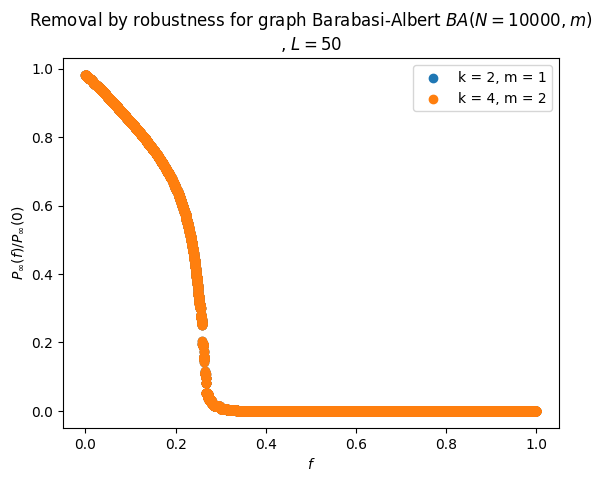

In [64]:
for kb in k_ba:
    m = int(kb / 2)
    BA = nx.barabasi_albert_graph(N, m)
    x_BA, y_BA = robustness(BA)
    plt.scatter(x_G, y_G, label="k = " + str(kb)+ ", m = "+str(round(m,4)))
plt.title(r"Removal by robustness for graph Barabasi-Albert $BA(N={}, m)$".format(N1) + "\n" + r", $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("BA_robustness.pdf")
plt.show()

In [ ]:
for kb in k_ba:
    m = int(kb / 2)
    BA = nx.barabasi_albert_graph(N, m)
    frac_P_inf = []
    for _ in range(L):
        BA_new = BA.copy()
        nodes_new = len(BA_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(BA_new)
        data = []
        data.append(1)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                nodes = dict(BA_new.degree())
                chosen_node = max(nodes, key=nodes.get)
                BA_new.remove_node(chosen_node)
            data.append(giant_component(BA_new) / P_inf_0)
        frac_P_inf.append(data)
    frac_P_inf = np.mean(frac_P_inf, axis=0)
    f = np.linspace(0, 1, L + 1)
    plt.scatter(f, frac_P_inf, label="k = " + str(kb))
plt.title(r"Barabasi-Albert graph $BA({}, m)$".format(N) + "\n" + r"with removal by robustness for $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("BA_robustness.pdf")
plt.show()

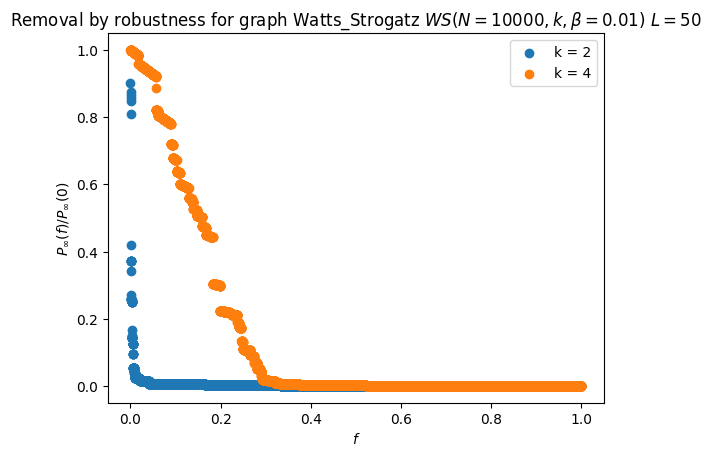

In [65]:
for kw in k_ws:
    WS = Watts_Strogatz_graph(N, kw, beta)
    x_WS, y_WS = robustness(WS)
    plt.scatter(x_WS, y_WS, label="k = " + str(kw))
plt.title(r"Removal by robustness for graph Watts_Strogatz $WS(N={}, k, \beta={})$".format(N1,beta) + r" $ L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("WS_robustness.pdf")
plt.show()

3. In the previous task attacks are based on the simplest measure of centrality, namely degree centrality. However, it could be done also based on the others. Please check robustness analogously as in the previous task based on the closeness and the betweenness centralities.

In [77]:
N=10**3
def closeness(g):
    m = nx.closeness_centrality(g)
    l = sorted(m.items(), key = operator.itemgetter(1), reverse=True)
    x = []
    y = []
    largest_component = max(nx.connected_components(g), key=len)
    n = len(g.nodes())
    x.append(0)
    y.append(len(largest_component) * 1. / n)
    R = 0.0
    for i in range(1, n):
        g.remove_node(l.pop(0)[0])
        m = nx.closeness_centrality(g)
        l = sorted(m.items(), key = operator.itemgetter(1), reverse=True)
        largest_component = max(nx.connected_components(g), key=len)
        x.append(i * 1. / n)
        R += len(largest_component) * 1. / n
        y.append(len(largest_component) * 1. / n)
    return x, y

def betweenness(g):
    m = nx.betweenness_centrality(g)
    l = sorted(m.items(), key = operator.itemgetter(1), reverse=True)
    x = []
    y = []
    largest_component = max(nx.connected_components(g), key=len)
    n = len(g.nodes())
    x.append(0)
    y.append(len(largest_component) * 1. / n)
    R = 0.0
    for i in range(1, n):
        g.remove_node(l.pop(0)[0])
        m = nx.betweenness_centrality(g)
        l = sorted(m.items(), key = operator.itemgetter(1), reverse=True)
        largest_component = max(nx.connected_components(g), key=len)
        x.append(i * 1. / n)
        R += len(largest_component) * 1. / n
        y.append(len(largest_component) * 1. / n)
    return x, y

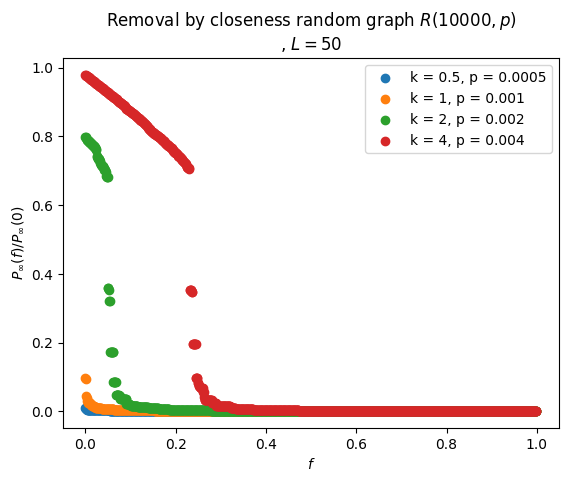

In [78]:
for k in k_rg:
    p = k / (N - 1)
    G = random_graph(N, p)
    x_G, y_G = closeness(G)
    plt.scatter(x_G, y_G, label="k = " + str(k)+ ", p = "+str(round(p,4)))
plt.title(r"Removal by closeness random graph $R({}, p)$".format(N1) + "\n" + r", $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("G_closeness.pdf")
plt.show()

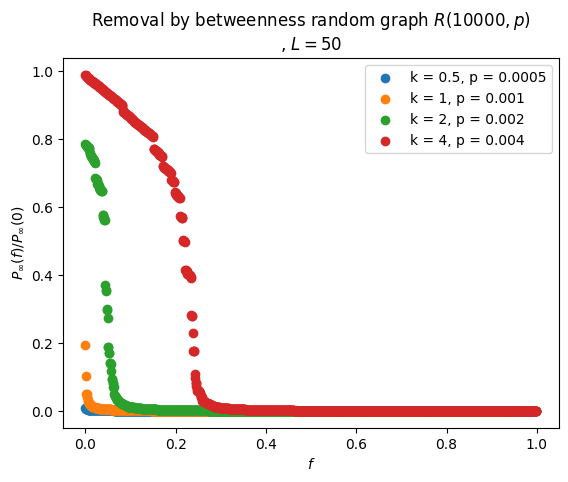

In [79]:
for k in k_rg:
    p = k / (N - 1)
    G = random_graph(N, p)
    x_G, y_G = betweenness(G)
    plt.scatter(x_G, y_G, label="k = " + str(k)+ ", p = "+str(round(p,4)))
plt.title(r"Removal by betweenness random graph $R({}, p)$".format(N1) + "\n" + r", $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("G_betweenness.pdf")
plt.show()

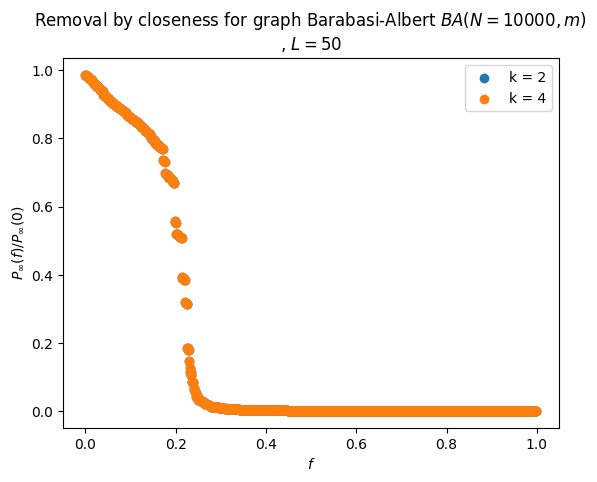

In [ ]:
for kb in k_ba:
    m = int(kb / 2)
    BA = nx.barabasi_albert_graph(N, m)
    x_BA, y_BA = closeness(BA)
    plt.scatter(x_G, y_G, label="k = " + str(kb))
plt.title(r"Removal by closeness for graph Barabasi-Albert $BA(N={}, m)$".format(N1) + "\n" + r", $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("BA_closeness.pdf")
plt.show()

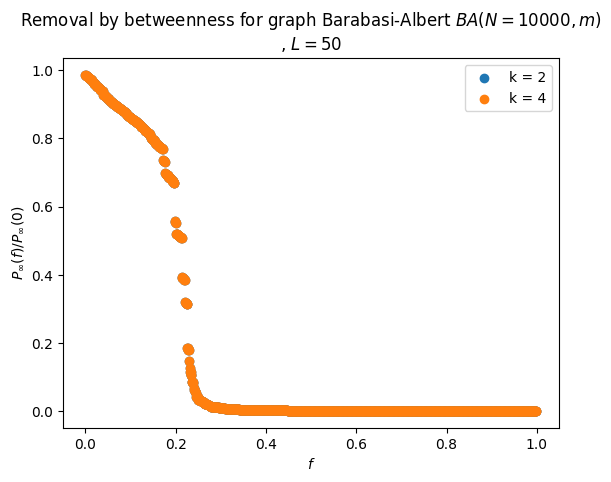

In [ ]:
for kb in k_ba:
    m = int(kb / 2)
    BA = nx.barabasi_albert_graph(N, m)
    x_BA, y_BA = betweenness(BA)
    plt.scatter(x_G, y_G, label="k = " + str(kb))
plt.title(r"Removal by betweenness for graph Barabasi-Albert $BA(N={}, m)$".format(N1) + "\n" + r", $L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("BA_betweenness.pdf")
plt.show()

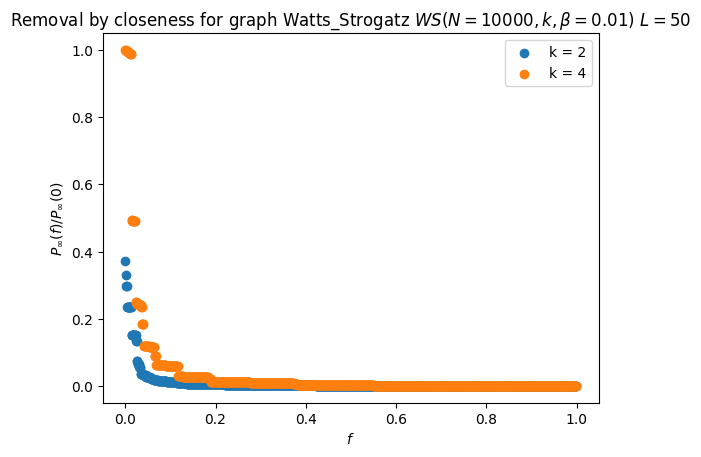

In [ ]:
for kw in k_ws:
    WS = Watts_Strogatz_graph(N, kw, beta)
    x_WS, y_WS = closeness(WS)
    plt.scatter(x_WS, y_WS, label="k = " + str(kw))
plt.title(r"Removal by closeness for graph Watts_Strogatz $WS(N={}, k, \beta={})$".format(N1,beta) + r" $ L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("WS_closeness.pdf")
plt.show()

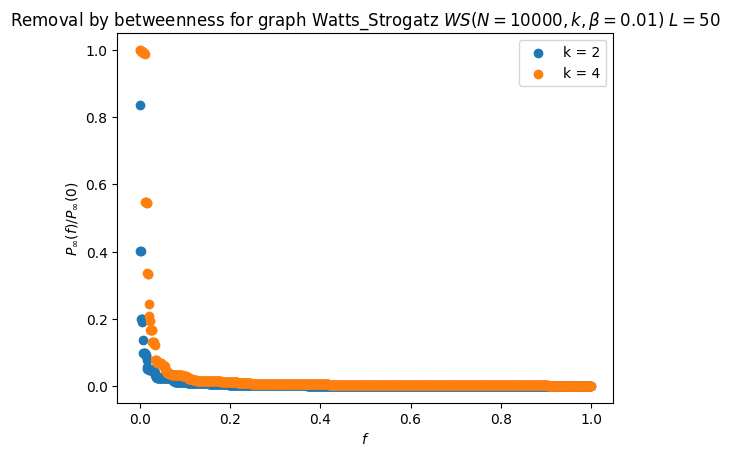

In [ ]:
for kw in k_ws:
    WS = Watts_Strogatz_graph(N, kw, beta)
    x_WS, y_WS = betweenness(WS)
    plt.scatter(x_WS, y_WS, label="k = " + str(kw))
plt.title(r"Removal by betweenness for graph Watts_Strogatz $WS(N={}, k, \beta={})$".format(N1,beta) + r" $ L = {}$".format(L))
plt.xlabel(r"$f$")
plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
plt.legend()
plt.savefig("WS_betweenness.pdf")
plt.show()

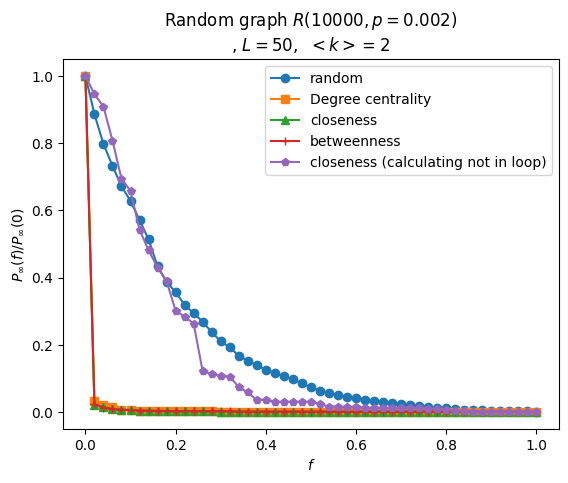

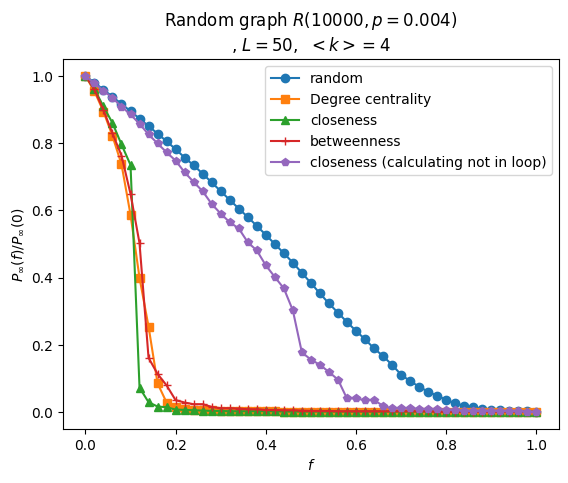

In [101]:
N=10**3
for k in[2,4]:
    m = int(k / 2)
    p = k / (N - 1)
    beta = 0.01

    # G = nx.fast_gnp_random_graph(N, p)
    G = nx.barabasi_albert_graph(N, m)
    #G = nx.watts_strogatz_graph(N, k, beta)
    frac_P_inf_random = []
    frac_P_inf_degree = []
    frac_P_inf_closeness = []
    frac_P_inf_betweenness = []

    for _ in range(L):
        G_new = G.copy()
        nodes_new = len(G_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(G_new)
        data_random = []
        data_random.append(1)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                node_random = list(G_new.nodes)
                random_node = random.choice(node_random)
                G_new.remove_node(random_node)
            data_random.append(giant_component(G_new) / P_inf_0)
        frac_P_inf_random.append(data_random)
    frac_P_inf_random = np.mean(frac_P_inf_random, axis=0)
    f = np.linspace(0, 1, L + 1)
    plt.plot(f, frac_P_inf_random, label="random", marker='o')

    for _ in range(L):
        G_new = G.copy()
        nodes_new = len(G_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(G_new)
        data_degree = []
        data_degree.append(1)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                nodes_degree = dict(G_new.degree())
                chosen_node_degree = max(nodes_degree, key=nodes_degree.get)
                G_new.remove_node(chosen_node_degree)
            data_degree.append(giant_component(G_new) / P_inf_0)
        frac_P_inf_degree.append(data_degree)
    frac_P_inf_degree = np.mean(frac_P_inf_degree, axis=0)
    f = np.linspace(0, 1, L + 1)
    plt.plot(f, frac_P_inf_degree, label="Degree centrality", marker='s')

    for _ in range(L):
        G_new = G.copy()
        nodes_new = len(G_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(G_new)
        data_closeness = []
        data_closeness.append(1)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                nodes_closeness = nx.closeness_centrality(G_new)
                chosen_node_closeness = max(nodes_closeness, key=nodes_closeness.get)
                G_new.remove_node(chosen_node_closeness)
            data_closeness.append(giant_component(G_new) / P_inf_0)
        frac_P_inf_closeness.append(data_closeness)
    frac_P_inf_closeness = np.mean(frac_P_inf_closeness, axis=0)
    f = np.linspace(0, 1, L + 1)
    plt.plot(f, frac_P_inf_closeness, label="closeness", marker='^')

    for _ in range(L):
        G_new = G.copy()
        nodes_new = len(G_new.nodes())
        nodes_per_unit = int(nodes_new / L)
        P_inf_0 = giant_component(G_new)
        data_betweenness = []
        data_betweenness.append(1)
        nodes_betweenness = nx.betweenness_centrality(G_new)
        for _ in range(0, L):
            for _ in range(nodes_per_unit):
                chosen_node_betweenness = max(nodes_betweenness, key=nodes_betweenness.get)
                G_new.remove_node(chosen_node_betweenness)
                nodes_betweenness.pop(chosen_node_betweenness)
            data_betweenness.append(giant_component(G_new) / P_inf_0)
        frac_P_inf_betweenness.append(data_betweenness)
    frac_P_inf_betweenness = np.mean(frac_P_inf_betweenness, axis=0)
    f = np.linspace(0, 1, L + 1)
    plt.plot(f, frac_P_inf_betweenness, label="betweenness", marker='+')
    f = np.linspace(0, 1, 50 + 1)
    frac_P_inf=np.loadtxt('p//Robustness for for random graph inny'+str(k)+'.txt')
    plt.plot(f, frac_P_inf, marker='p',label="closeness (calculating not in loop)")

    plt.title(r"Random graph $R({}, p={})$".format(N1,round(p,4)) + "\n" + r", $L = {}$,  $<k> = {}$".format(L,k))
    plt.xlabel(r"$f$")
    plt.ylabel(r"$P_{\infty}(f)/P_{\infty}(0)$")
    plt.legend()
    plt.show()